In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
import numpy as np
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
import matplotlib.pyplot as plt

In [2]:
model = read_sbml_model('iNF517.xml')

In [3]:
fseof = FSEOF(model)

In [4]:
result = fseof.run(target=model.reactions.EX_etoh_e)

In [5]:
df=result.data_frame

In [6]:
df

,1,2,3,4,5,6,7,8,9,10
ACALDt,-0.125919,-0.108060,-0.090202,-0.072343,-0.054484,-0.036625,-0.018766,-0.000908,-0.000000,0.000000
ADPTA,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159
ACHBS,0.072044,0.072044,0.072044,0.072044,0.072044,0.072044,0.072044,0.072044,0.063569,0.054639
BIOMASS_LLA,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635
ACLS,0.132986,0.138939,0.144892,0.150845,0.156798,0.162751,0.168704,0.174657,0.186260,0.198166
...,...,...,...,...,...,...,...,...,...,...
MCMAT5,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193
MCMAT6,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193
MCMAT7,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700
MCMAT8,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012


In [7]:
change = []
for i in range(len(df)):
    change.append(df.iloc[i,9]-df.iloc[i,0])
    
df['Change']=change

In [8]:
percent_change = []
for i in range(len(df)):
    if df.iloc[i,0] != 0:
        percent_change.append(((df.iloc[i,9]-df.iloc[i,0])/df.iloc[i,0])*100)
    else:
        percent_change.append(np.nan)

df['Percent_change']=percent_change

In [9]:
df_sorted = df.reindex(df.Percent_change.abs().sort_values(ascending=False).index) 
df_sorted.head(10)

,1,2,3,4,5,6,7,8,9,10,Change,Percent_change
THRA,0.008179,0.008179,0.008179,0.008179,0.008179,0.008179,0.008179,0.008179,0.016654,0.025584,0.017405,212.801076
ACALDt,-0.125919,-0.108060,-0.090202,-0.072343,-0.054484,-0.036625,-0.018766,-0.000908,-0.000000,0.000000,0.125919,-100.000000
ACLDC,0.132986,0.138939,0.144892,0.150845,0.156798,0.162751,0.168704,0.174657,0.186260,0.198166,0.065180,49.012678
DIACTt,0.132986,0.138939,0.144892,0.150845,0.156798,0.162751,0.168704,0.174657,0.186260,0.198166,0.065180,49.012678
ACTD,0.132986,0.138939,0.144892,0.150845,0.156798,0.162751,0.168704,0.174657,0.186260,0.198166,0.065180,49.012678
ACLS,0.132986,0.138939,0.144892,0.150845,0.156798,0.162751,0.168704,0.174657,0.186260,0.198166,0.065180,49.012678
GHMT2r,-0.037612,-0.037612,-0.037612,-0.037612,-0.037612,-0.037612,-0.037612,-0.037612,-0.046087,-0.055016,-0.017404,46.272466
MTHFD,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.057977,-0.066907,-0.017405,35.160196
MTHFC,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.049502,-0.057977,-0.066907,-0.017405,35.160196
FTHFLi,0.049502,0.049502,0.049502,0.049502,0.049502,0.049502,0.049502,0.049502,0.057977,0.066907,0.017405,35.160196


In [10]:
upreg_counter = 0
downreg_counter = 0
for i in range(0,205):
    if df_sorted.iloc[i,11] > 0:
        upreg_counter = upreg_counter + 1
    elif df_sorted.iloc[i,11] < 0:
        downreg_counter = downreg_counter + 1
    elif np.isnan(df_sorted.iloc[i,11]):         # the reactions which had 0 flux in the beginning is counted by the "Change" column instead
        if df_sorted.iloc[i,10] > 0:
            upreg_counter = upreg_counter + 1
        elif df_sorted.iloc[i,10] < 0:
            downreg_counter = downreg_counter + 1
            
print("There are",upreg_counter,"up-regulation targets and",downreg_counter,"down-regulation tagets.")

There are 26 up-regulation targets and 11 down-regulation tagets.


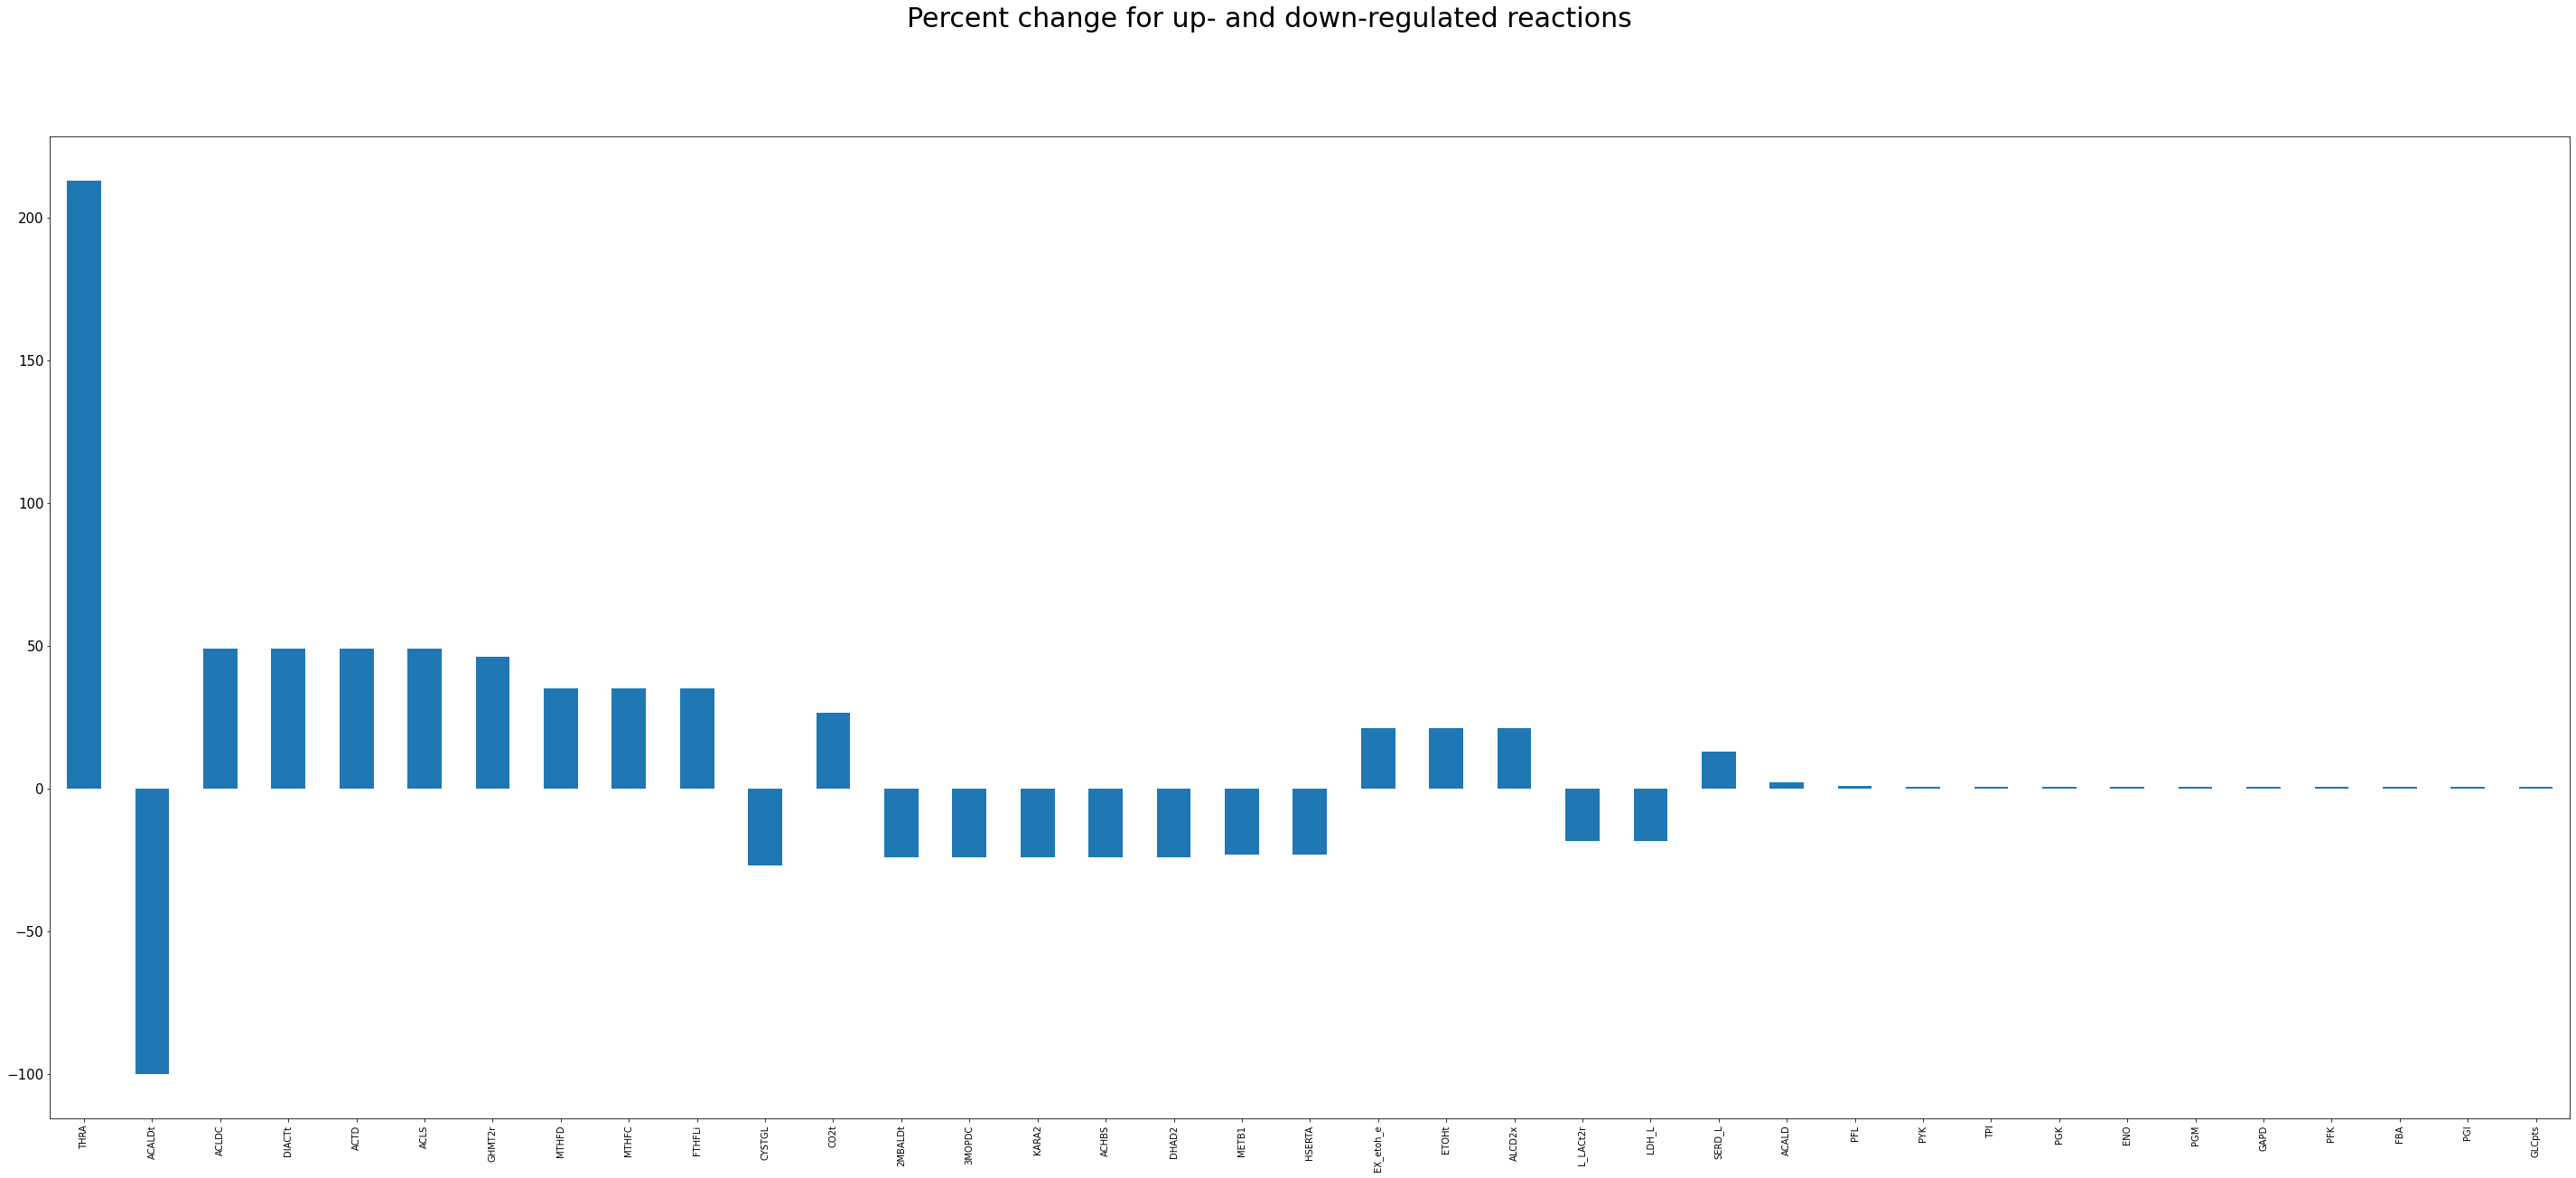

<Figure size 3600x1440 with 0 Axes>

In [17]:
plotdata = df_sorted.iloc[0:37,11]
fig = plotdata.plot(kind='bar')
plt.rcParams["figure.figsize"] = [50, 20]
fig.tick_params(axis='y', labelsize=15)
plt.suptitle("Percent change for up- and down-regulated reactions", fontsize=30)
plt.show()
plt.savefig('Image/Percent change for up- and down-regulated reactions.png')

In [12]:
for i in range(10):
    print(model.reactions.get_by_id(df_sorted.index.values[i]).id, model.reactions.get_by_id(df_sorted.index.values[i]).name)

THRA Threonine aldolase
ACALDt Acetaldehyde reversible transport
ACLDC Acetolactate decarboxylase
DIACTt Diacetyl diffusion
ACTD Acetoin dehydrogenase
ACLS Acetolactate synthase
GHMT2r Glycine hydroxymethyltransferase, reversible
MTHFD Methylenetetrahydrofolate dehydrogenase (NADP)
MTHFC Methenyltetrahydrofolate cyclohydrolase
FTHFLi Formate-tetrahydrofolate ligase


In [13]:
with model:
    model.optimize()
    print("Rate of ethanol production:", model.reactions.EX_etoh_e.flux,"mmol/(gDW*h)")
    print("Growth rate:", model.reactions.BIOMASS_LLA.flux,"h^-1")
    print("Yield for ethonal on glucose", model.reactions.EX_etoh_e.flux / (-1*model.reactions.EX_glc__D_e.flux),"mmol-ethanol / mmol-glucose")

Rate of ethanol production: 0.8255094355711166 mmol/(gDW*h)
Growth rate: 0.04263460544337379 h^-1
Yield for ethonal on glucose 0.6073874143733061 mmol-ethanol / mmol-glucose


In [14]:
with model:
    model.objective = model.reactions.EX_etoh_e
    model.optimize()
    print("Rate of ethanol production:", model.reactions.EX_etoh_e.flux,"mmol/(gDW*h)")
    print("Growth rate:", model.reactions.BIOMASS_LLA.flux,"h^-1")
    print("Yield for ethonal on glucose", model.reactions.EX_etoh_e.flux / (-1*model.reactions.EX_glc__D_e.flux),"mmol-ethanol / mmol-glucose")

Rate of ethanol production: 1.02 mmol/(gDW*h)
Growth rate: 0.042634605443373365 h^-1
Yield for ethonal on glucose 0.7294340929131924 mmol-ethanol / mmol-glucose


In [15]:
with model:
    for i in [x for x in range(0,207) if x != 19]:
        model.reactions.get_by_id(df_sorted.index.values[i]).bounds = df_sorted.iloc[i,10], df_sorted.iloc[i,10]
    model.optimize()
    print("Rate of ethanol production:", model.reactions.EX_etoh_e.flux,"mmol/(gDW*h)")
    print("Growth rate:", model.reactions.BIOMASS_LLA.flux,"h^-1")
    print("Yield for ethonal on glucose", model.reactions.EX_etoh_e.flux / (-1*model.reactions.EX_glc__D_e.flux),"mmol-ethanol / mmol-glucose")

Rate of ethanol production: 0.9595511099800069 mmol/(gDW*h)
Growth rate: 2.530748595429504e-05 h^-1
Yield for ethonal on glucose 0.8349393468132695 mmol-ethanol / mmol-glucose


C:\Users\chezha\Anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning:

Solver status is 'infeasible'.



In [16]:
for i in range(20):
    print(model.reactions.get_by_id(df_sorted.index.values[i]).id, model.reactions.get_by_id(df_sorted.index.values[i]).name)

THRA Threonine aldolase
ACALDt Acetaldehyde reversible transport
ACLDC Acetolactate decarboxylase
DIACTt Diacetyl diffusion
ACTD Acetoin dehydrogenase
ACLS Acetolactate synthase
GHMT2r Glycine hydroxymethyltransferase, reversible
MTHFD Methylenetetrahydrofolate dehydrogenase (NADP)
MTHFC Methenyltetrahydrofolate cyclohydrolase
FTHFLi Formate-tetrahydrofolate ligase
CYSTGL Cystathionine g lyase
CO2t CO2 transporter via diffusion
2MBALDt 2 Methylbutanal transport  extracellular 
3MOPDC 3 Methyl 2 oxopentanoate decarboxylase
KARA2 Ketol-acid reductoisomerase (2-Acetolactate)
ACHBS 2-aceto-2-hydroxybutanoate synthase
DHAD2 Dihydroxy-acid dehydratase (2,3-dihydroxy-3-methylpentanoate)
METB1 Metb1 (rev)
HSERTA Homoserine O trans acetylase
EX_etoh_e Ethanol exchange
